In [14]:
import pandas as pd
import glob
import os
import seaborn as sns; sns.set_theme(color_codes=True)
import math
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

################ IMPORT ######################
#Mulran
Oxford="./data/oxford_baseline-cfear-3_2022-04-28_1708"
mulran="./data/mulran_baseline-cfear-3_2022-04-28_1857"
paths=[Oxford,mulran]
df_datasets=[]
datasets=["Oxford","mulran"]
for i in [0,1]:
    #print(i)
    dataset=datasets[i]    
    path=paths[i+0]    
    jobs=glob(path+"/*/", recursive = True)
    df_jobs=[]
    for job in jobs:
        #print(job)
        d1=pd.read_csv(job+"/est/plot_path/acceleration_trans.txt",names=["abs_trans_acceleration"])
        d2=pd.read_csv(job+"/est/plot_path/vel_trans.txt",names=["speed [m/s]"])
        d3=pd.read_csv(job+"/est/plot_path/rmse_trans_squared.txt",names=["Position error [m]"])
        dfs=[d1,d2,d3]
        dd=pd.concat(dfs, axis=1)        
        dd=dd.dropna()
        dd['dataset'] = dd.apply (lambda row: dataset, axis=1)
        dd['abs_trans_acceleration'] = dd.apply (lambda row: np.fabs(row["abs_trans_acceleration"]), axis=1)
        dd['Position error [m]'] = dd.apply (lambda row: np.sqrt(row["Position error [m]"]), axis=1)
        #print(df)
        df_jobs.append(dd)
    all_jobs_one_dataset=pd.concat(df_jobs, axis=0)
    df_datasets.append(all_jobs_one_dataset)
dboth=pd.concat(df_datasets, axis=0)

print("Loaded dataset")        
print("Datapoints: "+str(dboth.shape[0]))
        
    

Loaded dataset
Datapoints: 92259


dataset: Oxford, max velocity:46.473705266046395 [km/h], max acceleraiton: 10.787040762576963
dataset: mulran, max velocity:62.92856278773626 [km/h], max acceleraiton: 18.412381420830975


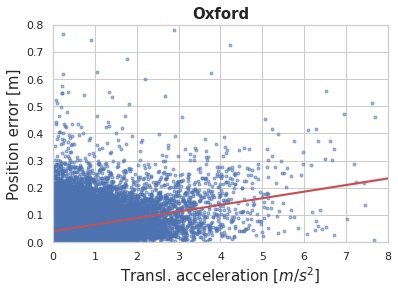

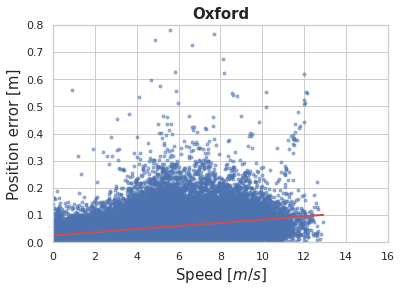

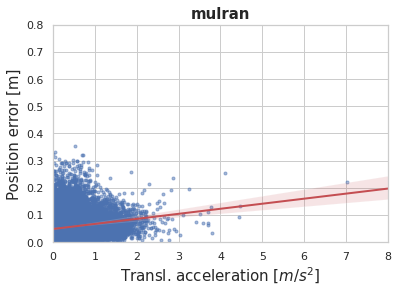

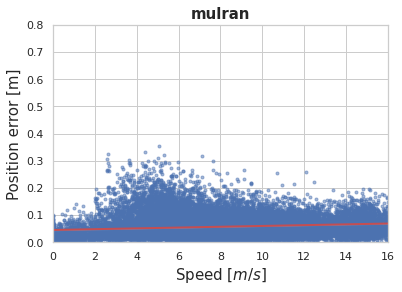

In [8]:
counter = 1
for dataset in datasets:
    df=dboth[(dboth["dataset"]==dataset) & (dboth["speed [m/s]"])>0.2]
    plot = plt.figure(counter)
    counter=counter+1
    sns.set_style('whitegrid')
    #sns.regplot(x=df["vel_trans"], y=df["rmse_trans_squared"], line_kws={"color":"r","alpha":0.7,"lw":5})
    ax=sns.regplot(x=df["abs_trans_acceleration"], y=df["Position error [m]"],marker=".", line_kws={"color":"r","alpha":1,"lw":2},scatter_kws={'alpha':0.5})
    ax.set_title(dataset,fontsize=15,fontweight ="bold")

    plt.ylim(0, 0.8)
    plt.xlim(0, 8)
    ax.set_xlabel(r"Transl. acceleration [$m/s^2$]", fontsize = 15) #, fontsize = 20
    ax.set_ylabel("Position error [m]", fontsize = 15) #, fontsize = 20
    plt.savefig("output/"+dataset+"_acceleraiton.png",dpi=100,bbox_inches="tight")
    plt.savefig("output/"+dataset+"_acceleraiton.pdf",bbox_inches="tight")
    #correlation = df["abs_trans_acceleration"].corr(df["Position error [m]"])
    #print(correlation)
    # Correlation, interesting but that useful
    #def histogram_intersection(a, b):
    #    v = np.minimum(a, b).sum().round(decimals=1)
    #    return v
    #df.corr(method=histogram_intersection)

    print("dataset: " + dataset+", max velocity:" + str(df["speed [m/s]"].max()*3.6)+" [km/h], max acceleraiton: "+str(df["abs_trans_acceleration"].max()))

    plot2 = plt.figure(counter)
    counter=counter+1

    ax=sns.regplot(x=df["speed [m/s]"], y=df["Position error [m]"], marker=".", line_kws={"color":"r","alpha":1,"lw":2},scatter_kws={'alpha':0.5})
    

    ax.set_title(dataset,fontsize=15, fontweight ="bold")
    plt.ylim(0, 0.8)
    plt.xlim(0, 16)
    ax.set_xlabel(r"Speed $[m/s]$", fontsize = 15) #
    ax.set_ylabel("Position error [m]", fontsize = 15)
    plt.savefig("output/"+dataset+"_velocity.png",dpi=100,bbox_inches="tight")
    plt.savefig("output/"+dataset+"_velocity.pdf",format="pdf",bbox_inches="tight")
    correlation2 = df["speed [m/s]"].corr(df["Position error [m]"])
    #print(correlation2)